<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Polynomial_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression -2
-----------------------------------

1. we will implement **polynomial Regression model** on the [dataset](https://github.com/teddcp/Machine-Learning-/tree/master/data-files) 'Position_salaries.csv'



# importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing Data


In [80]:
data=pd.read_csv('/content/Position_Salaries.csv')
data.drop(columns=['Position'],inplace=True)
data.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


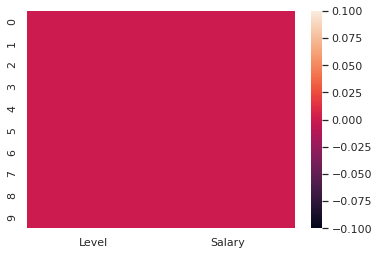

In [81]:
sns.heatmap(data.isna()) # no null value

In [82]:
data.info() # no categorical variable and no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [83]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


# Visualization

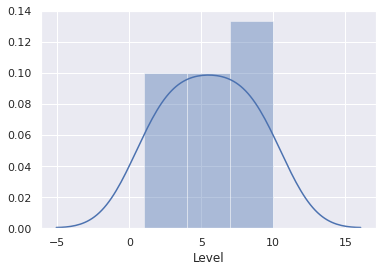

In [84]:
sns.distplot(data['Level'])

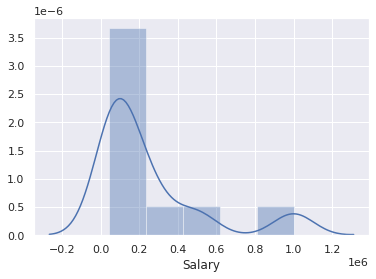

In [85]:
sns.distplot(data.Salary)

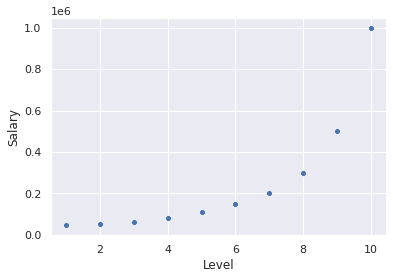

In [86]:
sns.scatterplot(x='Level',y='Salary', data=data)  # non-linear curve

# Data Splitting for training and testing

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x=data.iloc[:,[1]]
y=data.iloc[:,-1]

In [0]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=42)


# Training the model

In [0]:
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.pipeline import make_pipeline as mp 
from sklearn.linear_model import LinearRegression as lr

In [0]:
pipe= mp(pf(include_bias=False), lr(fit_intercept=True) )

In [92]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [93]:
pipe.named_steps['linearregression'].coef_ , pipe.named_steps['linearregression'].intercept_  # intercepts and coefficients

# 2 coefficeints and 1 intercept for ax^2 + bx + c for one feature x

(array([1.00000000e+00, 2.71404774e-22]), 5.820766091346741e-11)

# Testing the model

In [0]:
pred=pipe.predict(x_test)

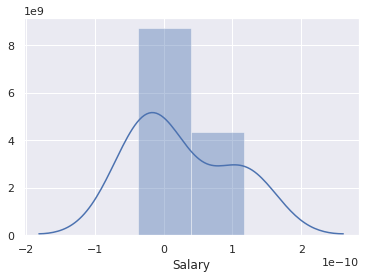

In [95]:
sns.distplot(y_test-pred) #Gaussian Distribution

In [0]:
# #sorting predicted values with respect to predictor
# sorted_zip = sorted(zip(x_test,pred))
# #x_poly, poly_pred = zip(*sorted_zip)
# #x_poly,poly_pred
# sorted_zip

# Evaluation model : Accuracy

In [0]:
from sklearn.metrics import r2_score,mean_squared_error as mse

In [98]:
np.sqrt(mse(y_test,pred))  # RMSE

7.041783897127595e-11

In [99]:
round(r2_score(y_test,pred),2)   # A Perfect Model as 100% Accuracy is achieved

1.0

Links

https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/

https://codekarim.com/node/43